<a href="https://colab.research.google.com/github/Naganadel17/private/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/MyDrive/Colab Notebooks
Epoch 0: Loss = 1.0988, Accuracy = 33.33%
Epoch 100: Loss = 0.6332, Accuracy = 67.33%
Epoch 200: Loss = 0.4622, Accuracy = 82.00%
Epoch 300: Loss = 0.3850, Accuracy = 91.33%
Epoch 400: Loss = 0.3229, Accuracy = 96.67%
Epoch 500: Loss = 0.2764, Accuracy = 96.67%
Epoch 600: Loss = 0.2434, Accuracy = 97.33%
Epoch 700: Loss = 0.2194, Accuracy = 97.33%
Epoch 800: Loss = 0.2013, Accuracy = 97.33%
Epoch 900: Loss = 0.1872, Accuracy = 98.00%


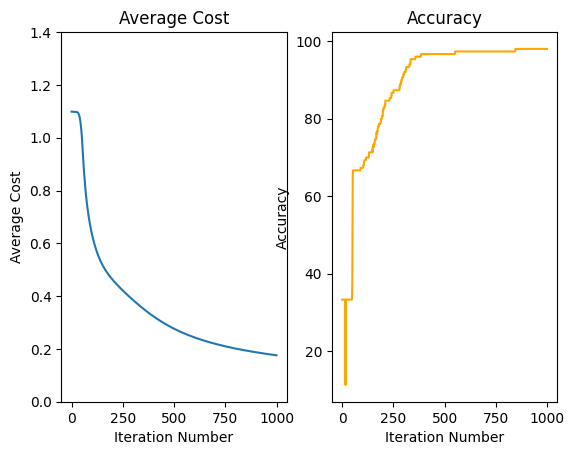

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%cd /content/drive/MyDrive/Colab Notebooks/

iris = pd.read_csv("Iris.csv")

labels = {"Iris-setosa":0,
          "Iris-versicolor":1,
          "Iris-virginica":2
          }

x = iris[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
y = iris['Species'].values
y = np.array([labels[label] for label in y])

epochs = 1000
learning_rate = 0.1
reg = 0.001

input_dim = 4;
hidden_dim = 4;
output_dim = 3;

W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

losses = []
accs = []

for epoch in range(epochs):
    hidden_output = np.maximum(0, x.dot(W1) + b1)

    output_scores = hidden_output.dot(W2) + b2

    output_probs = np.exp(output_scores) / np.sum(np.exp(output_scores), axis=1, keepdims=True)

    output_delta = output_probs.copy()
    output_delta[range(x.shape[0]), y] -= 1
    output_delta /= x.shape[0]

    W2_grad = hidden_output.T.dot(output_delta) + reg * W2
    b2_grad = np.sum(output_delta, axis=0, keepdims=True)

    hidden_delta = output_delta.dot(W2.T)
    hidden_delta[hidden_output <= 0] = 0

    W1_grad = x.T.dot(hidden_delta) + reg * W1
    b1_grad = np.sum(hidden_delta, axis=0, keepdims=True)

    W1 -= learning_rate * W1_grad
    W2 -= learning_rate * W2_grad
    b1 -= learning_rate * b1_grad
    b2 -= learning_rate * b2_grad

    hidden_output = np.maximum(0, x.dot(W1) + b1)
    output_scores = hidden_output.dot(W2) + b2
    predicted_labels = np.argmax(output_scores, axis=1)

    accuracy = np.mean(predicted_labels == y) * 100
    data_loss = -np.sum(np.log(output_probs[range(x.shape[0]), y])) / x.shape[0]
    reg_loss = 0.5 * reg * (np.sum(W2**2) + np.sum(W1**2))
    total_loss = data_loss + reg_loss

    losses.append(total_loss)
    accs.append(accuracy)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {total_loss:.4f}, Accuracy = {accuracy:.2f}%")

ax = plt.subplot(1,2,1)
plt.ylim(0,1.4)
plt.plot(losses)
plt.title('Average Cost')
plt.ylabel('Average Cost')
plt.xlabel('Iteration Number')

bx = plt.subplot(1,2,2)
plt.plot(accs, color='orange')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iteration Number')
plt.show()